In [ ]:
import pandas as pd

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# データの読み込み
df = pd.read_csv("cleaned_dataset_v0.2.csv")

In [ ]:
df.head()

,Country,Year,UFMR(per1000births)_Both,UFMR(per1000births)_Male,UFMR(per1000births)_Female,Number_of_deaths_UF_Both,Number_of_deaths_UF_Male,Number_of_deaths_UF_Female,Early initiation of breastfeeding (%),Infants exclusively breastfed for the first six months of life (%),Region,UFMR_SDGS_Category
0,Algeria,2012,26.49,28.25,24.65,24174.0,13188.0,10986.0,35.7,25.4,Africa,Target Not Achieved
1,Algeria,2006,32.34,34.42,30.10,22698.0,12399.0,10299.0,49.5,6.9,Africa,Target Not Achieved
2,Angola,2015,88.34,95.01,81.18,100216.0,54635.0,45581.0,48.3,37.4,Africa,Target Not Achieved
3,Benin,2014,100.13,106.74,93.10,39709.0,21615.0,18094.0,46.6,41.4,Africa,Target Not Achieved
4,Benin,2012,104.60,111.33,97.46,39244.0,21327.0,17917.0,50.4,32.5,Africa,Target Not Achieved


In [ ]:
# 1. 目的変数をSDGs基準に基づいて2値分類（UFMRが25以下を「目標達成」、26以上を「目標未達」）
sdgs_labels = ['Target Achieved', 'Target Not Achieved']  # 2つのクラスラベルを定義
df['UFMR_SDGS_Category'] = pd.cut(df['UFMR(per1000births)_Both'], bins=[0, 25, float('inf')], labels=sdgs_labels)

# 2. One-Hot Encoding（Regionをエンコーディング）
df_encoded_ann = pd.get_dummies(df, columns=['Region'], drop_first=True)

# 3. 説明変数と目的変数の定義
features_ann = ['Year', 'Early initiation of breastfeeding (%)',
                'Infants exclusively breastfed for the first six months of life (%)'] + \
               [col for col in df_encoded_ann.columns if col.startswith("Region_")]
X_ann = df_encoded_ann[features_ann]
y_ann = df_encoded_ann['UFMR_SDGS_Category']

# 4. データの前処理（ラベルを0と1に変換）
y_ann = y_ann.map({'Target Achieved': 0, 'Target Not Achieved': 1})  # 0: Target Achieved, 1: Target Not Achieved
y_ann = y_ann.astype(int) # Explicitly convert y_ann to integer dtype



In [ ]:
# 5. データを学習用とテスト用に分割
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X_ann, y_ann, test_size=0.2, random_state=42)

# 6. 特徴量の標準化
scaler = StandardScaler()
X_train_ann = scaler.fit_transform(X_train_ann)
X_test_ann = scaler.transform(X_test_ann)



In [ ]:
#[1 hidden layers (16nodes)]

# 7. モデルの構築
model = Sequential()

# 入力層と隠れ層（最初の層）を設定（ノード数は16、活性化関数はReLU）
model.add(Dense(16, input_dim=X_train_ann.shape[1], activation='relu'))

# 出力層（1ノード、活性化関数はSigmoid）
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#[2 hidden layers (16, 8 nodes)]

# 7. モデルの構築
model = Sequential()

# 入力層と隠れ層（最初の層）を設定（ノード数は16、活性化関数はReLU）
model.add(Dense(16, input_dim=X_train_ann.shape[1], activation='relu'))

# 隠れ層（ノード数は8、活性化関数はReLU）
model.add(Dense(8, activation='relu'))

# 出力層（1ノード、活性化関数はSigmoid）
model.add(Dense(1, activation='sigmoid'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#[3 hidden layers (16, 8, 4 nodes)]
# 7. モデルの構築
model = Sequential()

# 入力層と隠れ層（最初の層）を設定（ノード数は16、活性化関数はReLU）
model.add(Dense(16, input_dim=X_train_ann.shape[1], activation='relu'))

# 隠れ層（ノード数は8、活性化関数はReLU）
model.add(Dense(8, activation='relu'))

# 隠れ層（ノード数は4、活性化関数はReLU）
model.add(Dense(4, activation='relu'))

# 出力層（1ノード、活性化関数はSigmoid）
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 8. モデルのコンパイル
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 9. モデルの学習
model.fit(X_train_ann, y_train_ann, epochs=50, batch_size=10, verbose=1)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3518 - loss: 1.0068
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4579 - loss: 0.8492
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6005 - loss: 0.7385
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6521 - loss: 0.6651
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6934 - loss: 0.5927
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7093 - loss: 0.5551
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7301 - loss: 0.5228
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7670 - loss: 0.4994  
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7875 - loss: 0.4812 
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8649 - loss: 0.4233 
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8799 - loss: 0.3994 
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8681

In [ ]:
# 10. モデルの評価
_, train_acc = model.evaluate(X_train_ann, y_train_ann, verbose=0)
_, test_acc = model.evaluate(X_test_ann, y_test_ann, verbose=0)

In [ ]:

# 11. テストデータでの予測
y_test_pred_ann = (model.predict(X_test_ann) > 0.5).astype(int)  # 出力を0/1に変換

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [ ]:
# 12. 混同行列と評価レポートの作成
conf_matrix_ann = confusion_matrix(y_test_ann, y_test_pred_ann)
class_report_ann = classification_report(y_test_ann, y_test_pred_ann, target_names=sdgs_labels)

# 結果の表示
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print("\nConfusion Matrix (ANN):\n", conf_matrix_ann)
print("\nClassification Report (ANN):\n", class_report_ann)

Training Accuracy: 0.8889
Test Accuracy: 0.8961

Confusion Matrix (ANN):
 [[ 7  6]
 [ 2 62]]

Classification Report (ANN):
                      precision    recall  f1-score   support

    Target Achieved       0.78      0.54      0.64        13
Target Not Achieved       0.91      0.97      0.94        64

           accuracy                           0.90        77
          macro avg       0.84      0.75      0.79        77
       weighted avg       0.89      0.90      0.89        77



In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.8 MB/s eta 0:00:00


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


  0%|          | 0/77 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
612/612 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
612/612 ━━━━━━

TypeError: only integer scalar arrays can be converted to a scalar index

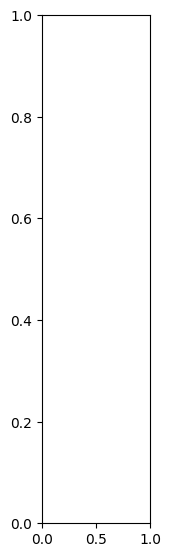

In [ ]:
import shap

# SHAP値を計算するためのExplainerを定義
explainer = shap.KernelExplainer(model.predict, X_test_ann)

# テストデータのSHAP値を計算
shap_values = explainer.shap_values(X_test_ann)

# 特徴量の影響度を可視化
shap.summary_plot(shap_values, X_test_ann, feature_names=features_ann)